# Exploratory Data Analysis

## Import packages

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [29]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [30]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [31]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---
## Sub-Task 1
## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [32]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [33]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [34]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [35]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization
Define 2 functions.
The first function `plot_stacked_bars` is used to plot a stacked bar chart. 
The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps to plot the distribution of a numeric column.

In [36]:
def plot_stacked_bars(dataframe, variable, title_, need_pivot= True, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    if need_pivot:
        dataframe = dataframe.groupby([variable,'churn']).size().reset_index(name='count')
        dataframe = dataframe.pivot(index= variable, columns='churn', values='count').fillna(0)
        dataframe = dataframe.div(dataframe.sum(axis=1), axis=0)*100
    else:
        dataframe = dataframe[[variable, 'churn']]
        dataframe = dataframe.groupby(dataframe['churn']).count()
        dataframe = dataframe/dataframe.sum()*100
        dataframe = dataframe.transpose()
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Precentage (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50, has_churn=True):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    if has_churn:
        # Create a temporal dataframe with the data to be plot
        temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
        "Churn":dataframe[dataframe["churn"]==1][column]})
        # Plot the histogram
        temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    else:
        dataframe[column].plot(kind='hist', bins=bins_, ax=ax)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Company

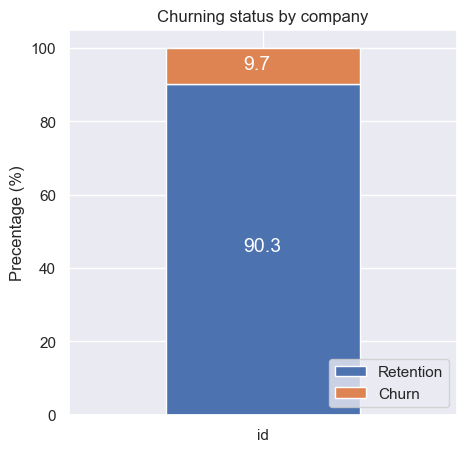

In [37]:
# plot stacked bar chart of churning status by company
plot_stacked_bars(client_df, 'id', "Churning status by company", need_pivot=False, size_=(5,5), legend_="lower right")

Channel sales

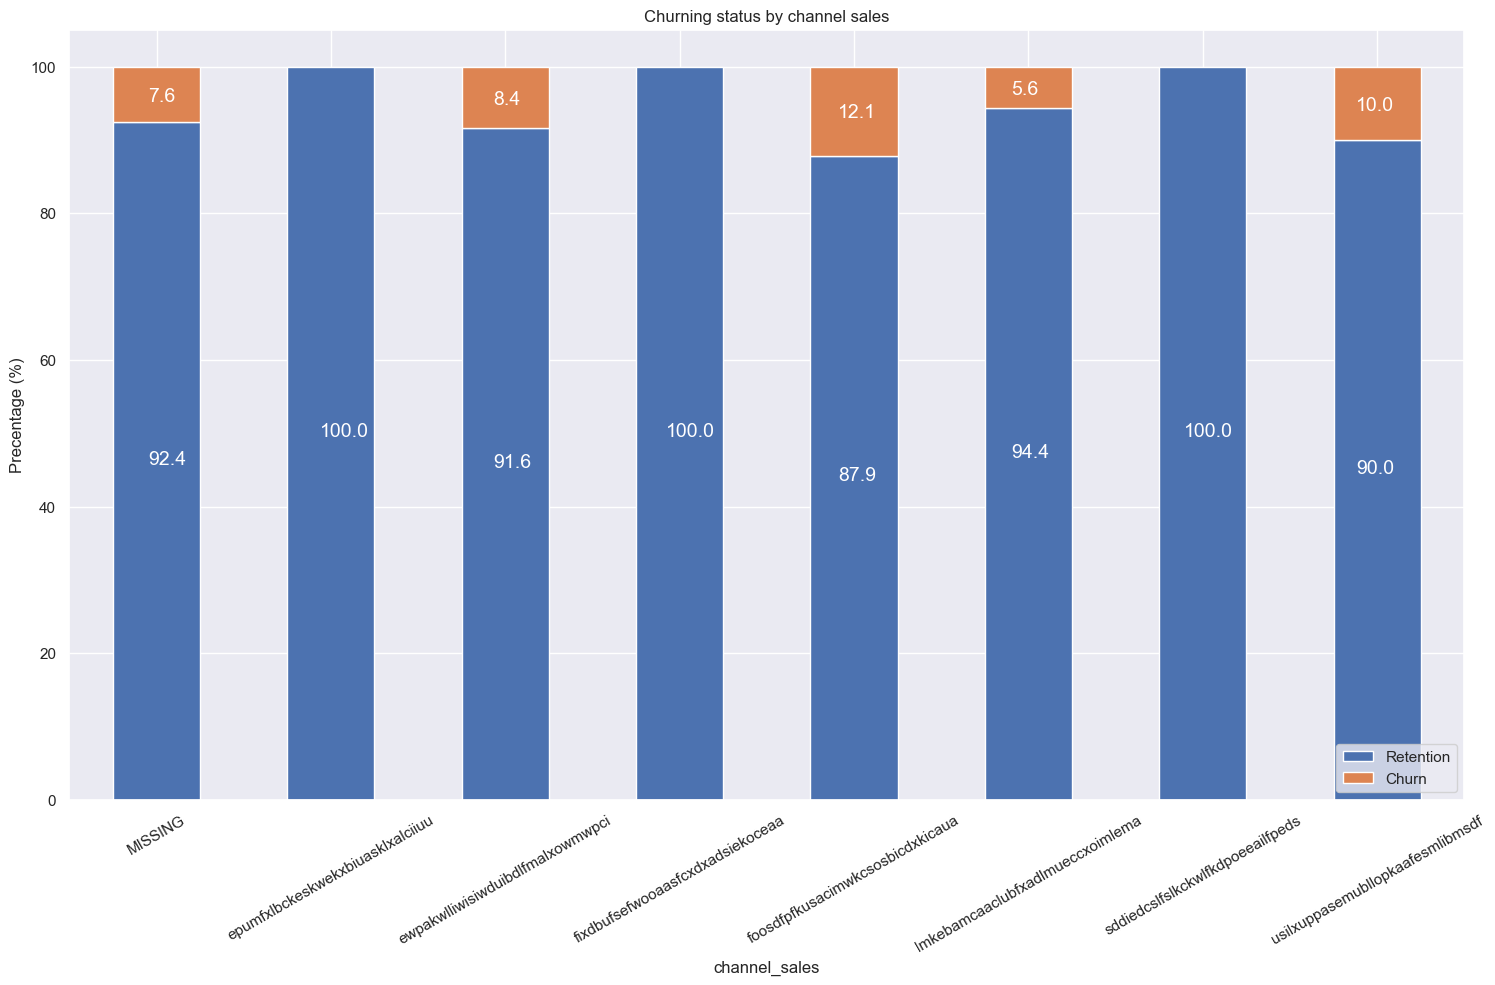

In [38]:
# plot stacked bars chart of churning status by channel sales
plot_stacked_bars(client_df, 'channel_sales', 'Churning status by channel sales', rot_=30, legend_="lower right")


Consumption

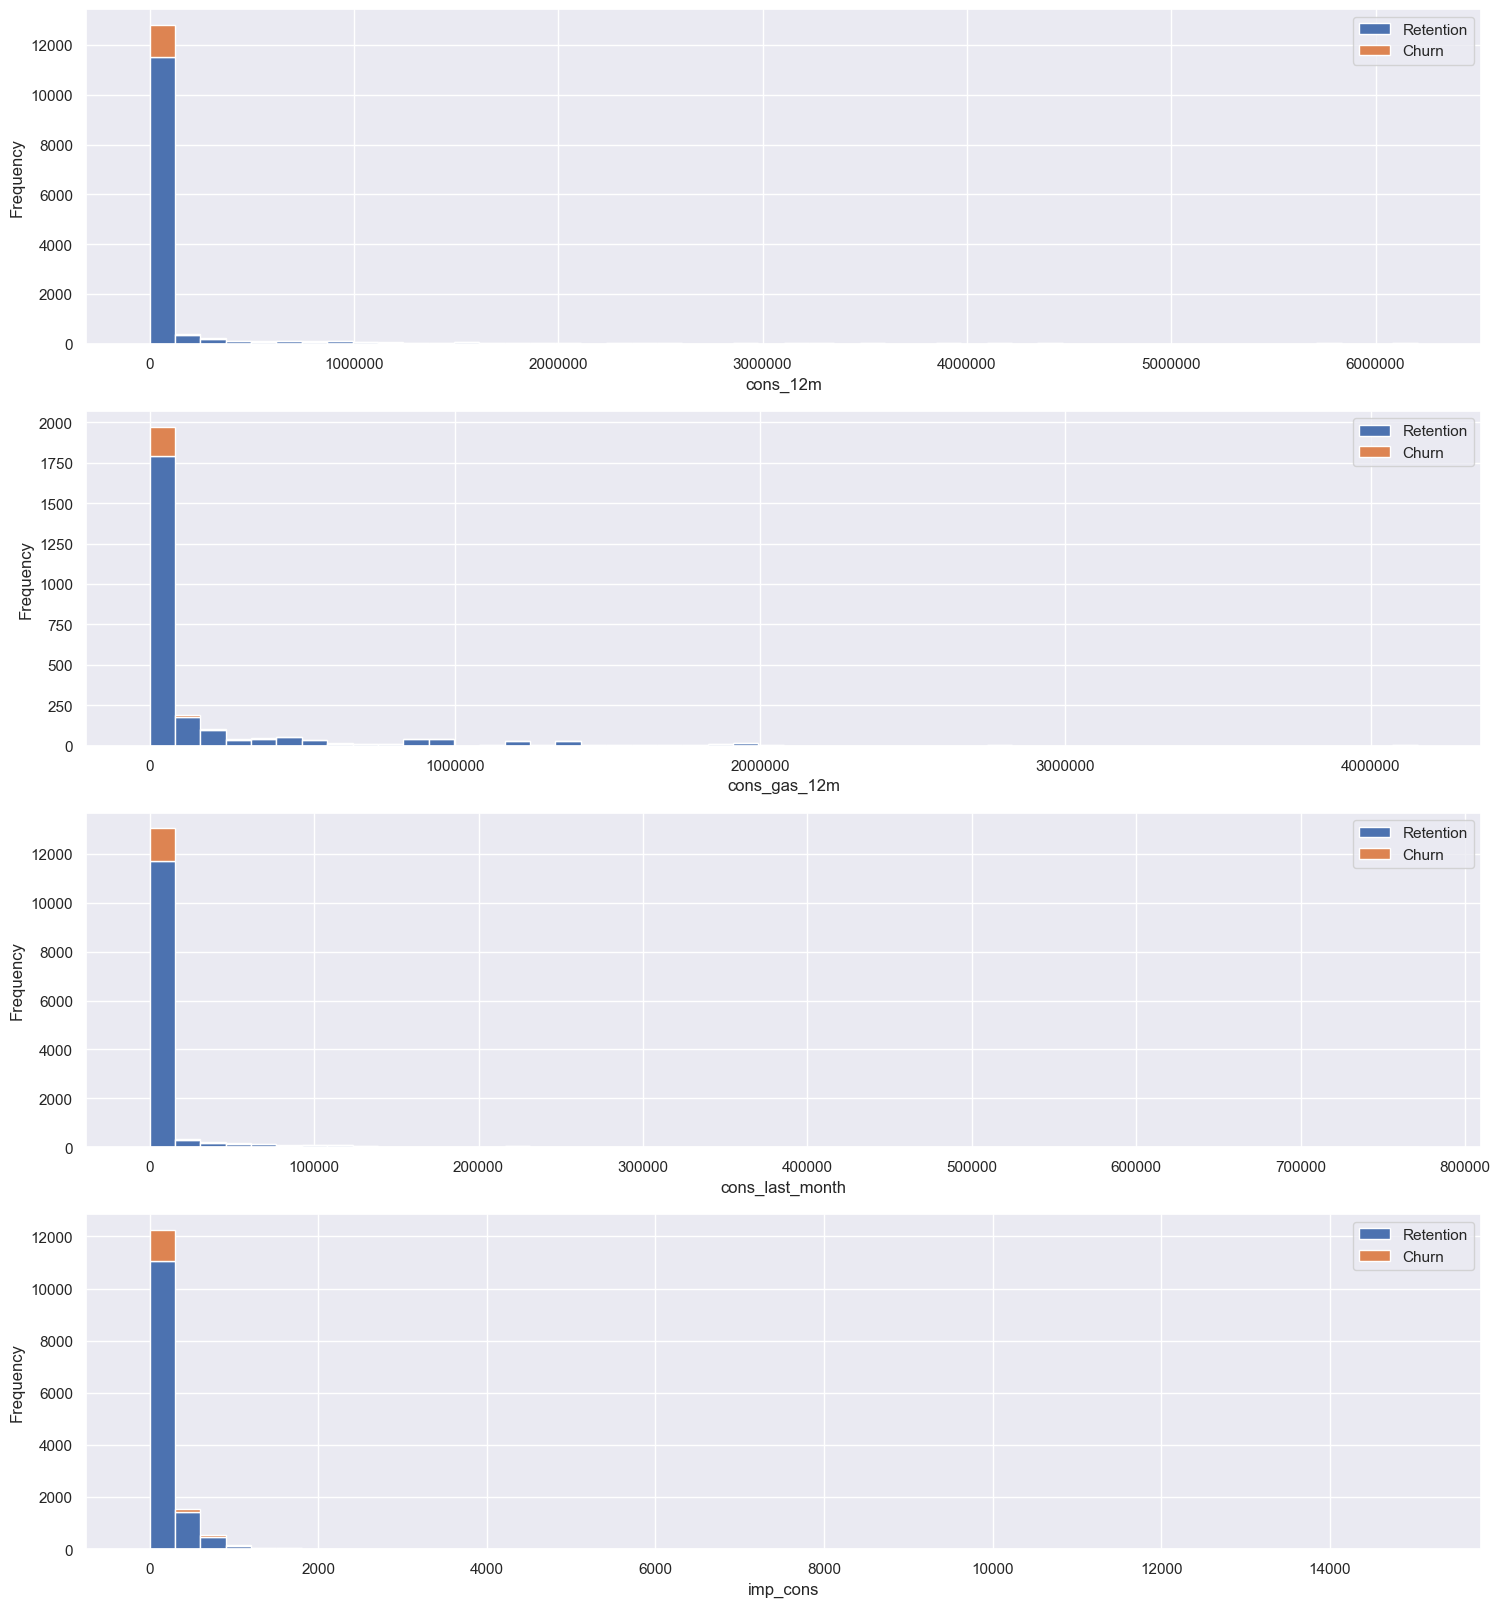

In [39]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 20))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Forecast

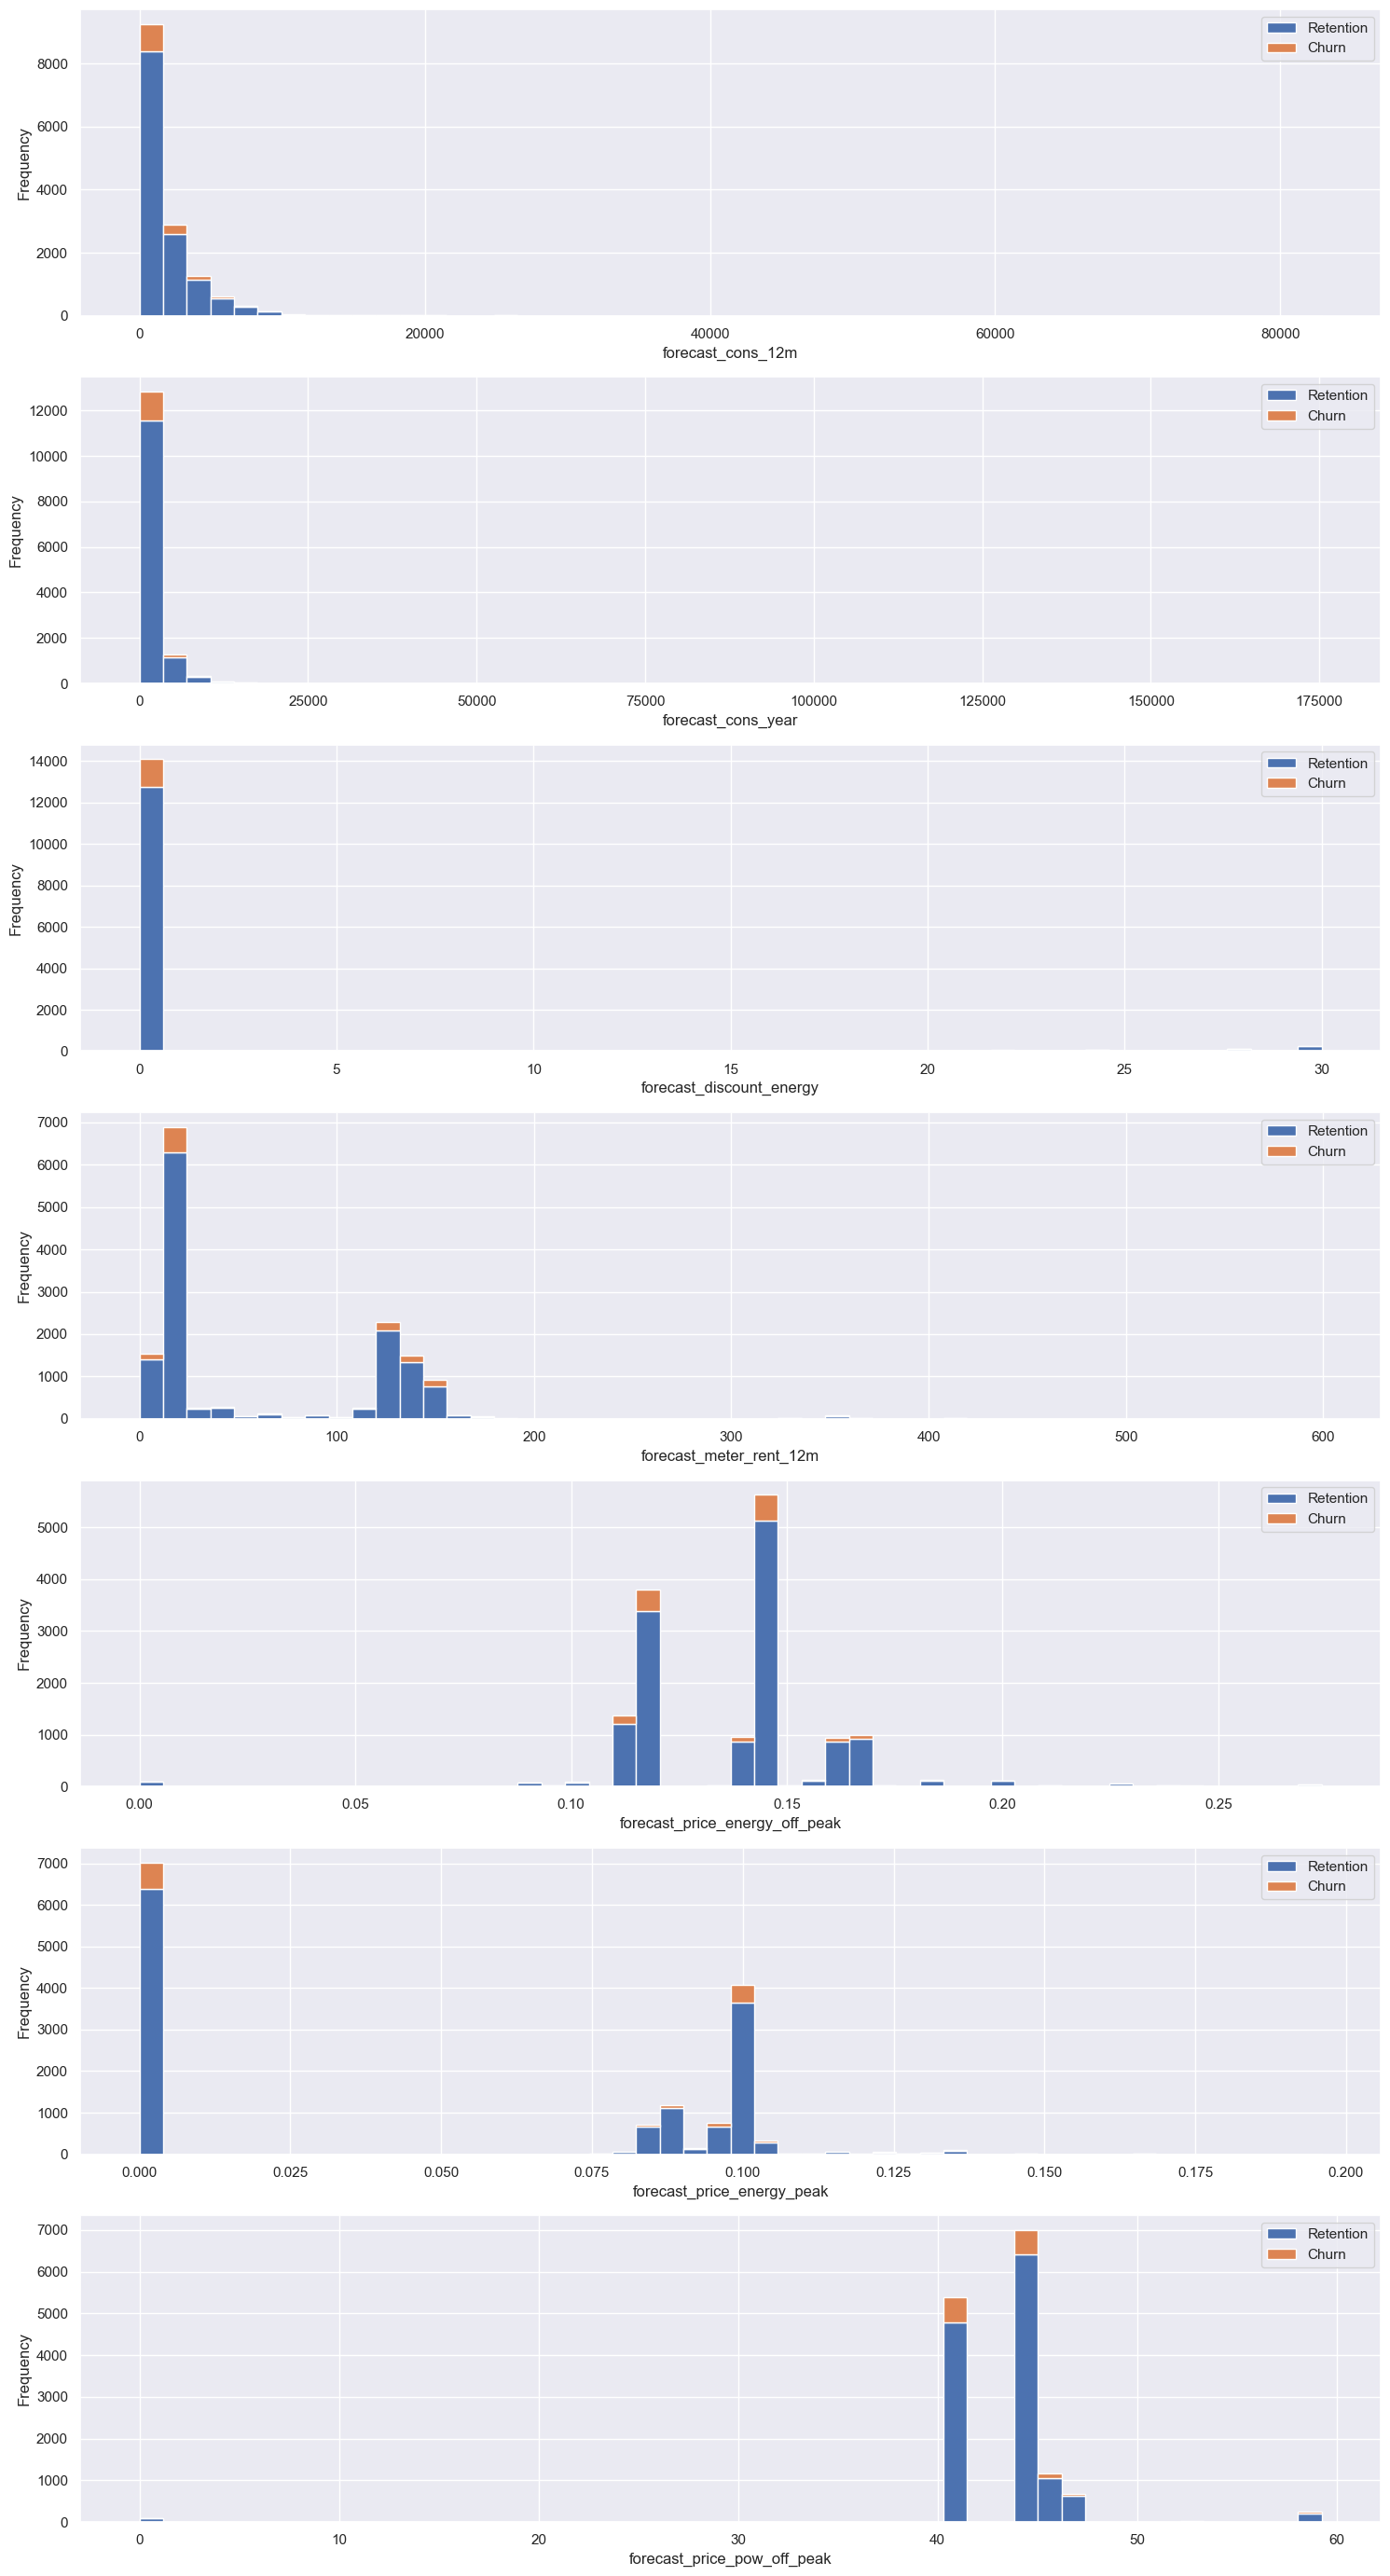

In [40]:
forecast = client_df[["id", 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak','churn']]

fig, axs = plt.subplots(nrows=7, figsize=(18, 35))

for n, item in enumerate(forecast.columns[1:-1]) :
    
    plot_distribution(forecast, item, axs[n])


Has gas

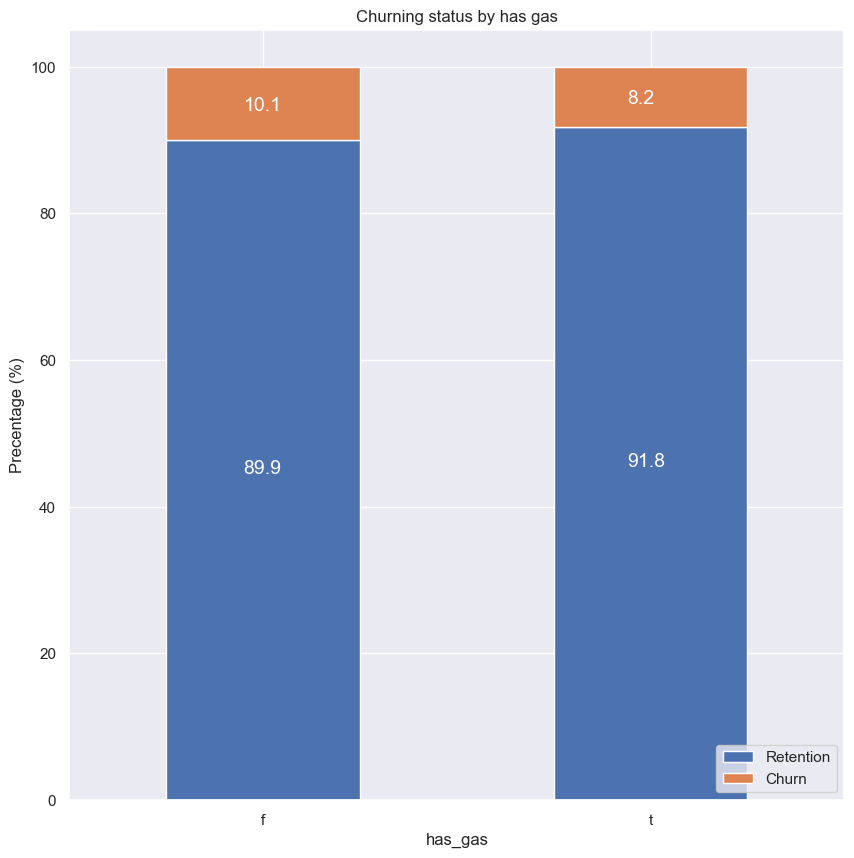

In [41]:
# plot stacked bars chart of churning status by has gas
plot_stacked_bars(client_df, 'has_gas', 'Churning status by has gas', size_ = (10,10), legend_="lower right")

Margin

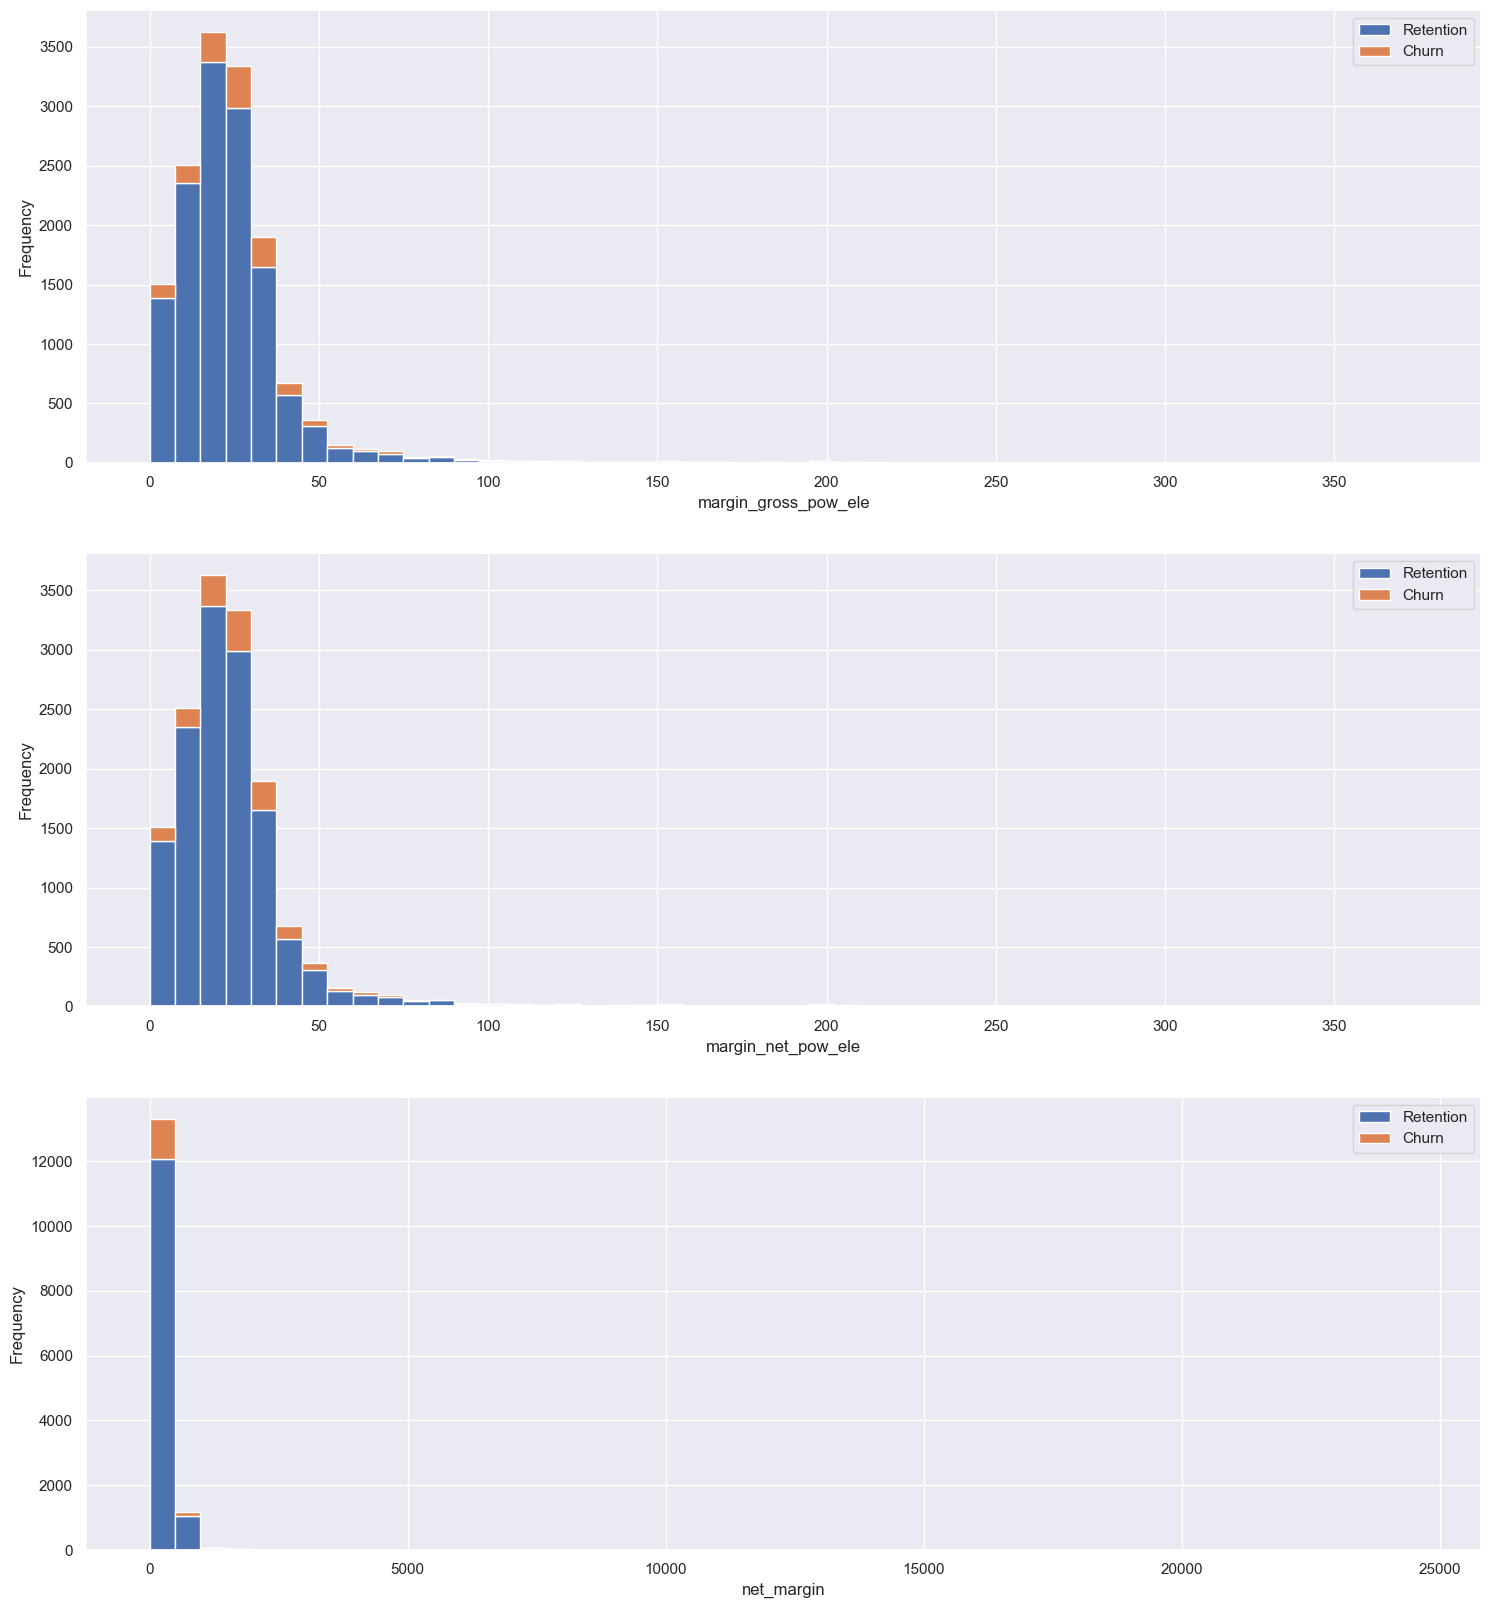

In [42]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']]

fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

for n, item in enumerate(margin.columns[1:-1]) :
    
    plot_distribution(margin, item, axs[n])

Number of active products

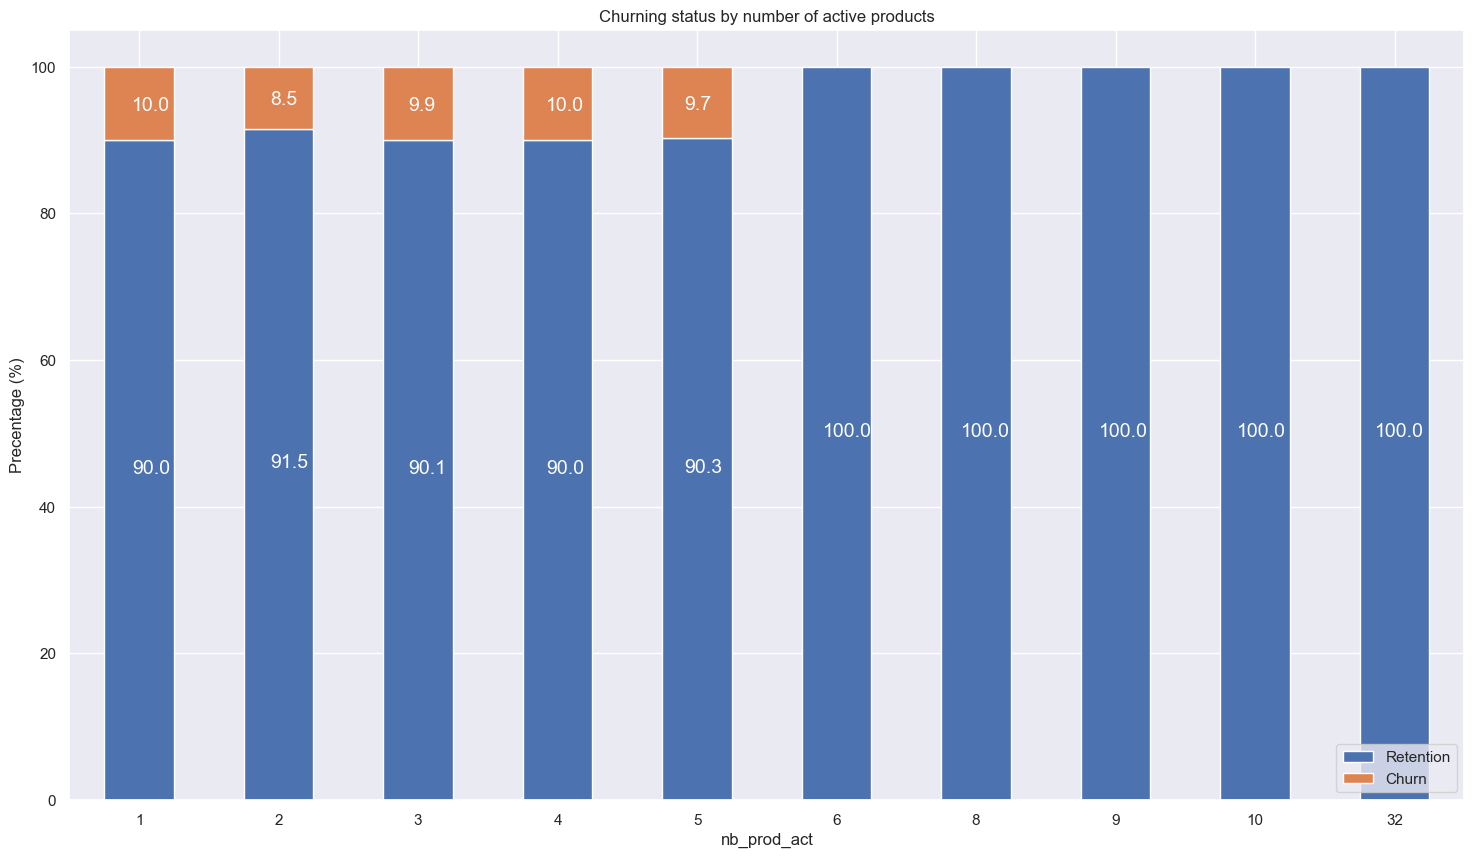

In [43]:
plot_stacked_bars(client_df, 'nb_prod_act', 'Churning status by number of active products', legend_="lower right")

Subscribed power

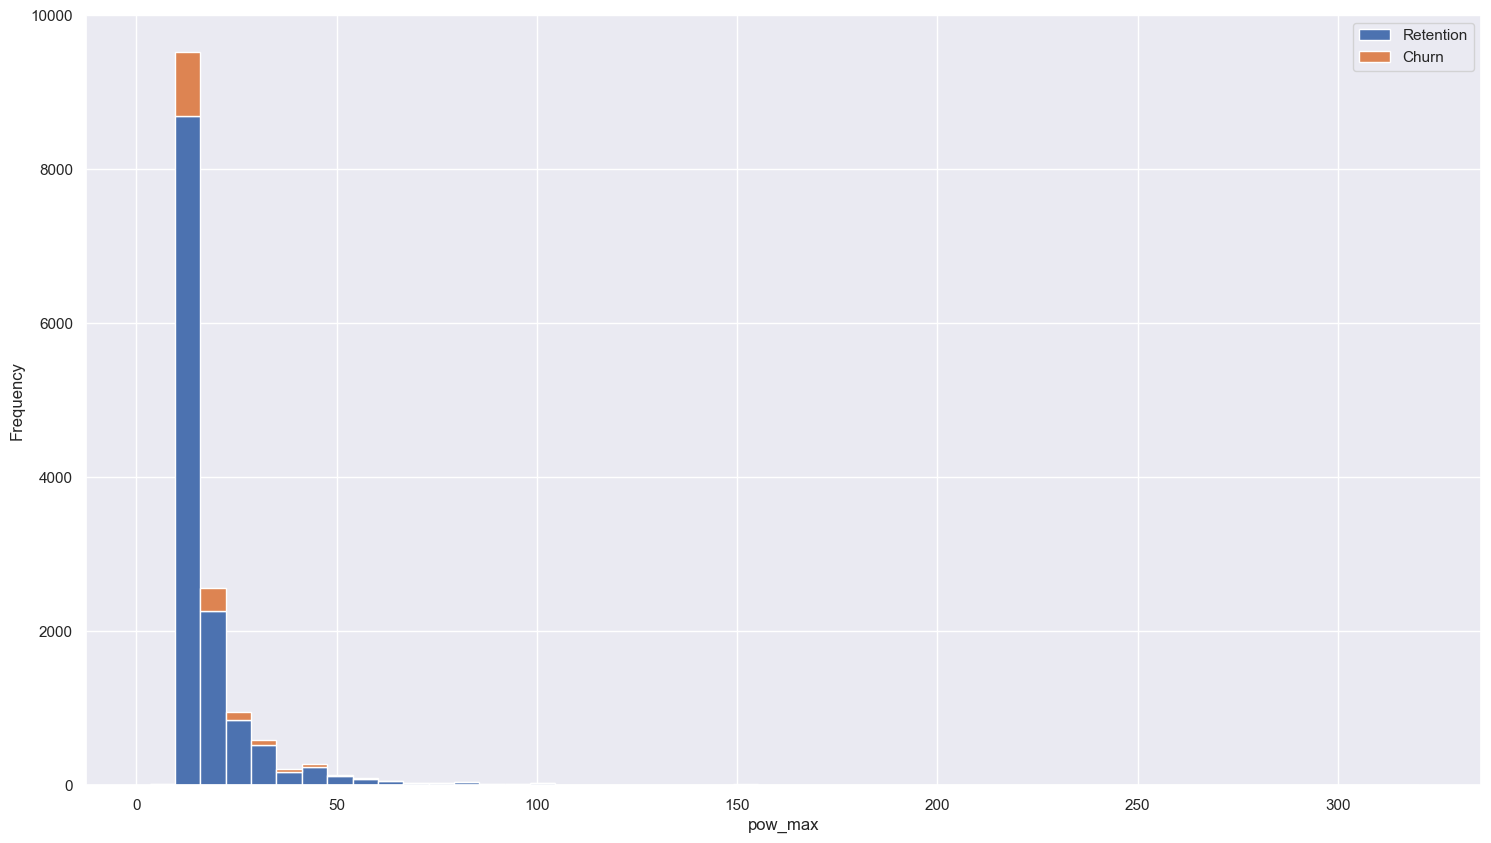

In [44]:
# plot histogram of subscribed power by churn
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))

plot_distribution(client_df, 'pow_max', axs)

Origin up

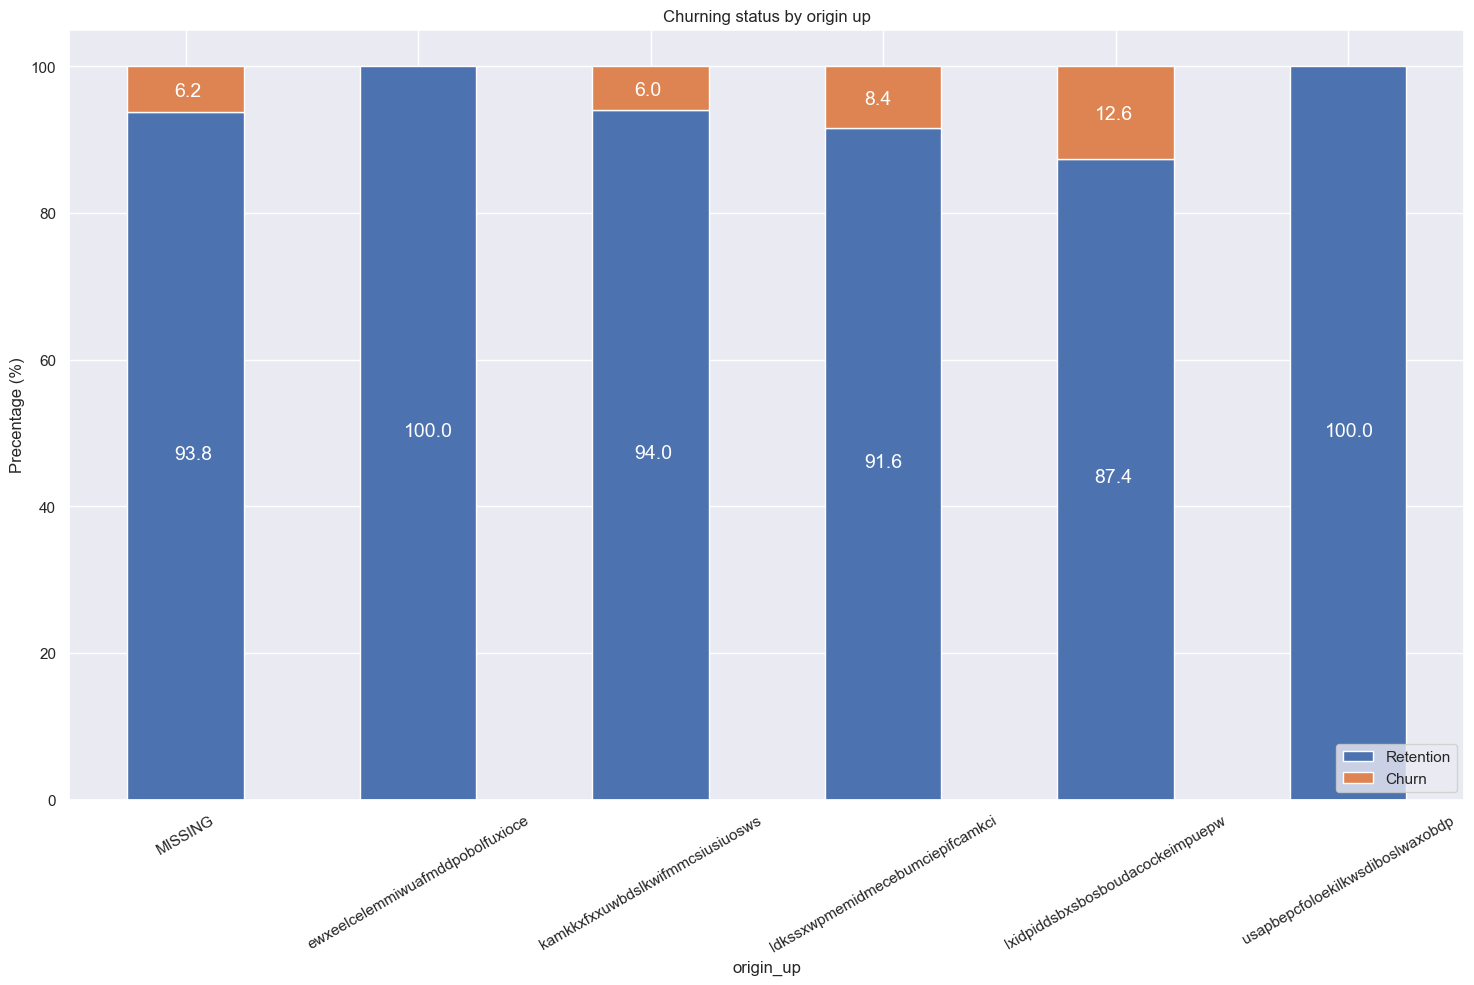

In [45]:
# plot stacked bars chart of churning status by origin up
plot_stacked_bars(client_df, 'origin_up', 'Churning status by origin up', rot_=30, legend_="lower right")

Antiquity of the client 

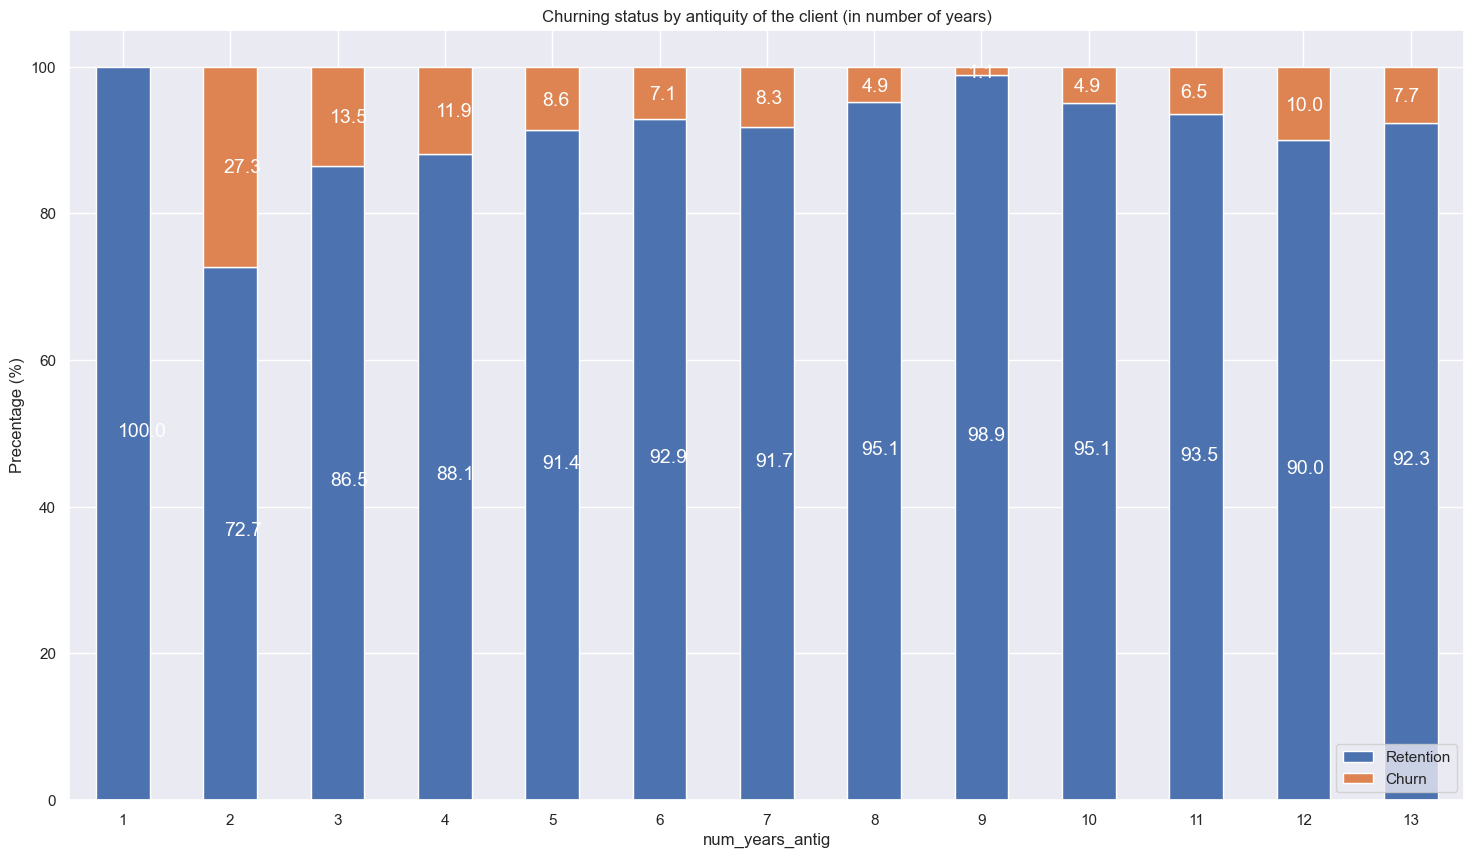

In [46]:
plot_stacked_bars(client_df, 'num_years_antig', 'Churning status by antiquity of the client (in number of years)', legend_="lower right")


Price

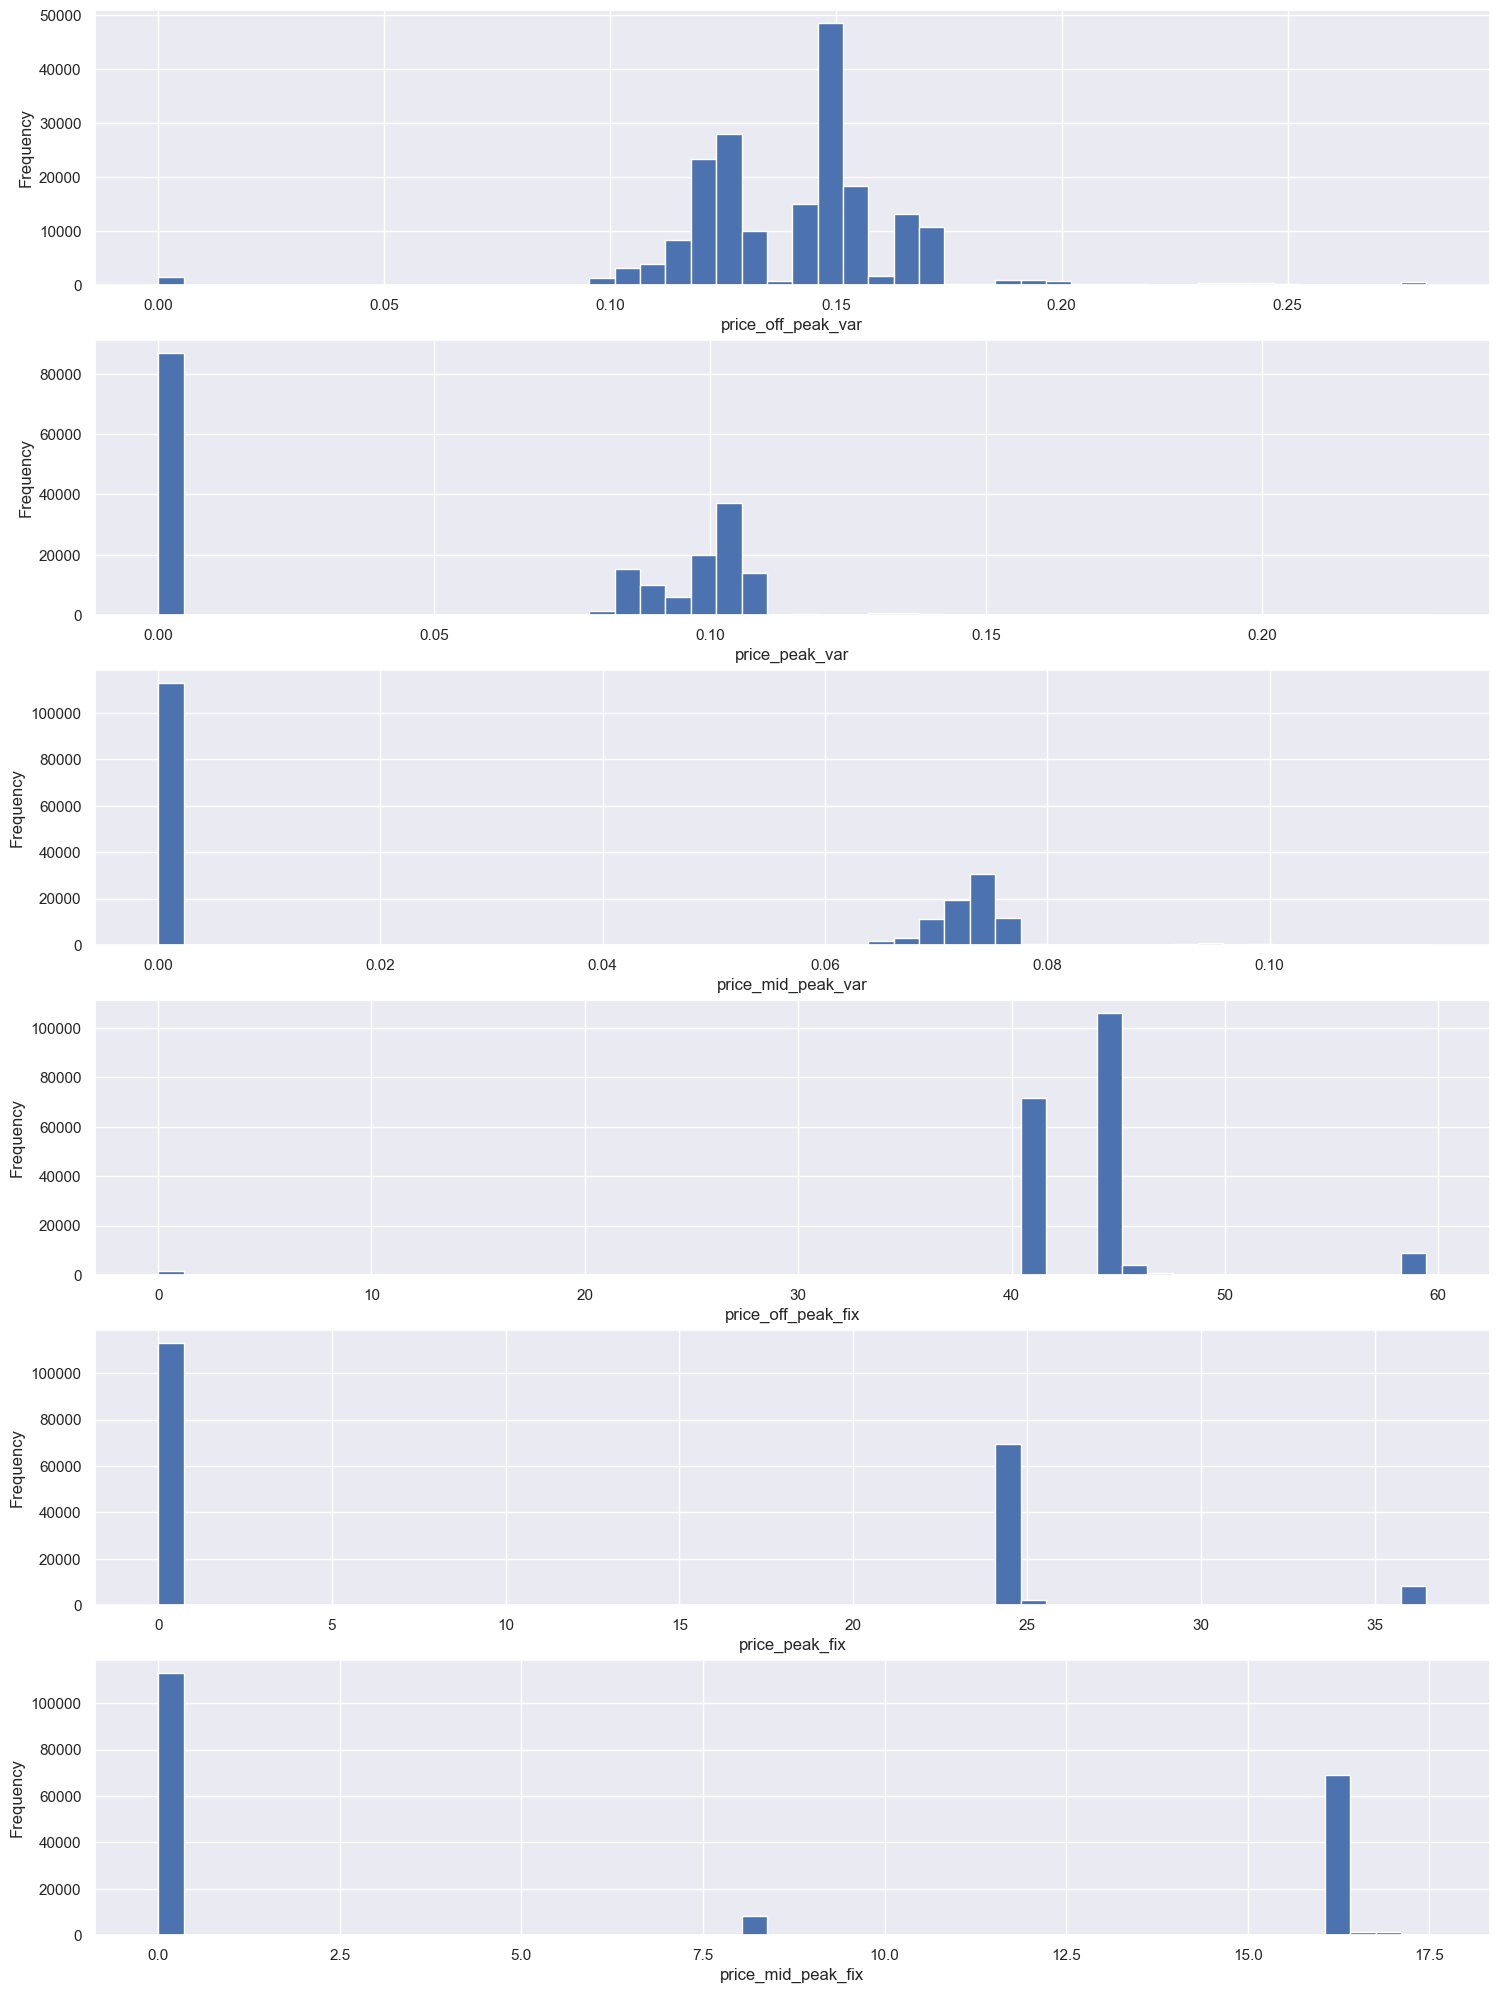

In [47]:
fig, axs = plt.subplots(nrows=6, figsize=(18, 25))

for n, item in enumerate(price_df.columns[2:]) :
    
    plot_distribution(price_df, item, axs[n], has_churn=False)

---
## Sub-Task 2

In [48]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [49]:
# calculate mean price for each company
mean_price = price_df.groupby(['id']).mean()

# rename columns
mean_price = mean_price.rename(
    index=str,
    columns={
        'price_off_peak_var': 'mean_price_p1_var',
        'price_peak_var': 'mean_price_p2_var',
        'price_mid_peak_var': 'mean_price_p3_var',
        'price_off_peak_fix': 'mean_price_p1_fix',
        'price_peak_fix': 'mean_price_p2_fix',
        'price_mid_peak_fix': 'mean_price_p3_fix'
    },
    
)

# calculate total mean price for each period
mean_price['mean_price_p1'] = mean_price['mean_price_p1_fix'] + mean_price['mean_price_p1_var']
mean_price['mean_price_p2'] = mean_price['mean_price_p2_fix'] + mean_price['mean_price_p2_var']
mean_price['mean_price_p3'] = mean_price['mean_price_p3_fix'] + mean_price['mean_price_p3_var']

C:\Users\ROG\AppData\Local\Temp\ipykernel_21032\1804918124.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price = price_df.groupby(['id']).mean()


In [53]:
# calculate total forecast price for period 1
client_df['forecast_price_p1'] = client_df['forecast_price_energy_off_peak'] + client_df['forecast_price_pow_off_peak']

# merge mean price with client dataframe
price_analysis = pd.merge(mean_price, client_df[['id', 'forecast_price_p1', 'churn']], on='id')
# calculate difference between mean price and forecast price for period 1
price_analysis['dff_price_p1'] = price_analysis['mean_price_p1'] - price_analysis['forecast_price_p1']

# define function to swap columns
def swap_columns(dataframe, col1, col2):
    col_list = list(dataframe.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    dataframe = dataframe[col_list]
    return dataframe

# swap dff_price_p1 and churn columns
price_analysis = swap_columns(price_analysis, 'dff_price_p1', 'churn')

price_analysis.head(3)


,id,mean_price_p1_var,mean_price_p2_var,mean_price_p3_var,mean_price_p1_fix,mean_price_p2_fix,mean_price_p3_fix,mean_price_p1,mean_price_p2,mean_price_p3,forecast_price_p1,dff_price_p1,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,40.723601,0.102470,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,44.453443,0.078434,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,46.006108,-0.504840,0


C:\Users\ROG\AppData\Local\Temp\ipykernel_21032\627891792.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_analysis.corr()


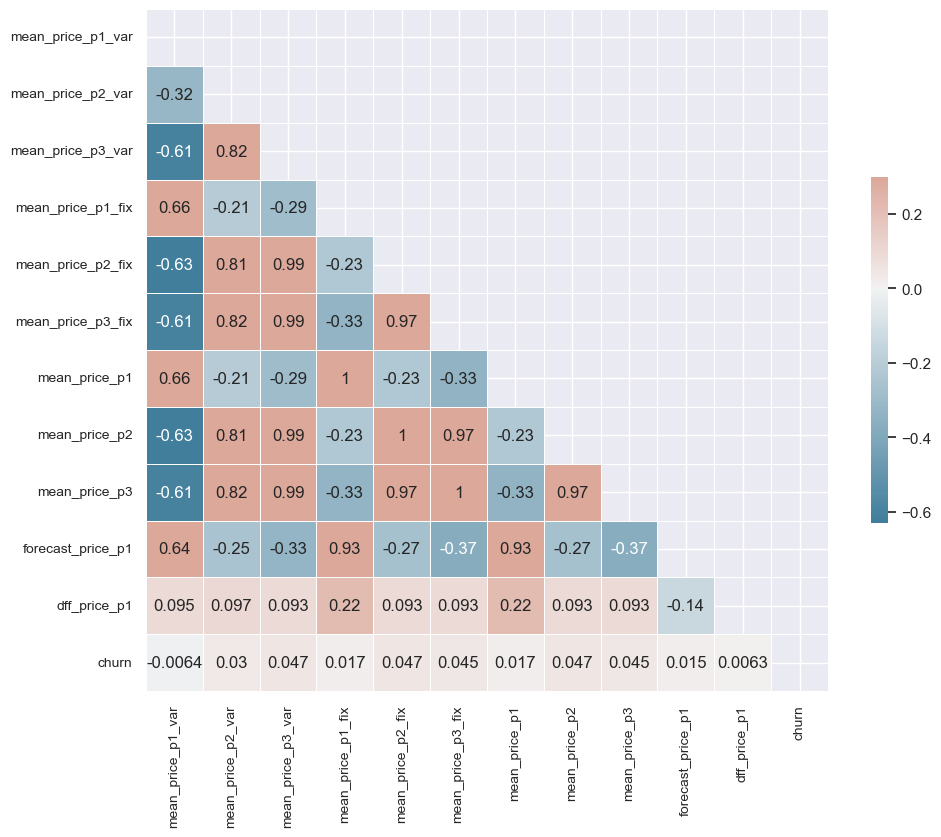

In [54]:
# Compute the correlation matrix
corr = price_analysis.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

---
## Sub-Task 3

There only aroun 10% customers decided to churn

Majority data are skewed and have outliers, which need to be treated before modelling

The correlation between price sensitivity and churn is low




